In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


                 precision    recall  f1-score   support

         Europe       1.00      1.00      1.00        61
         France       0.97      1.00      0.98        65
        Germany       1.00      0.96      0.98        69
      Hong Kong       0.63      0.87      0.73        53
      Indonesia       0.89      0.69      0.78        58
          Japan       0.87      0.69      0.77        58
 Mainland China       0.93      0.83      0.88        69
       Malaysia       0.70      0.68      0.69        57
    Middle East       1.00      1.00      1.00        67
  North America       1.00      1.00      1.00        60
North East Asia       1.00      1.00      1.00        65
        Oceania       1.00      1.00      1.00        64
    Philippines       0.84      0.84      0.84        58
     South Asia       1.00      1.00      1.00        58
South East Asia       0.98      1.00      0.99        61
       Thailand       0.64      0.78      0.70        54
 United Kingdom       0.98    

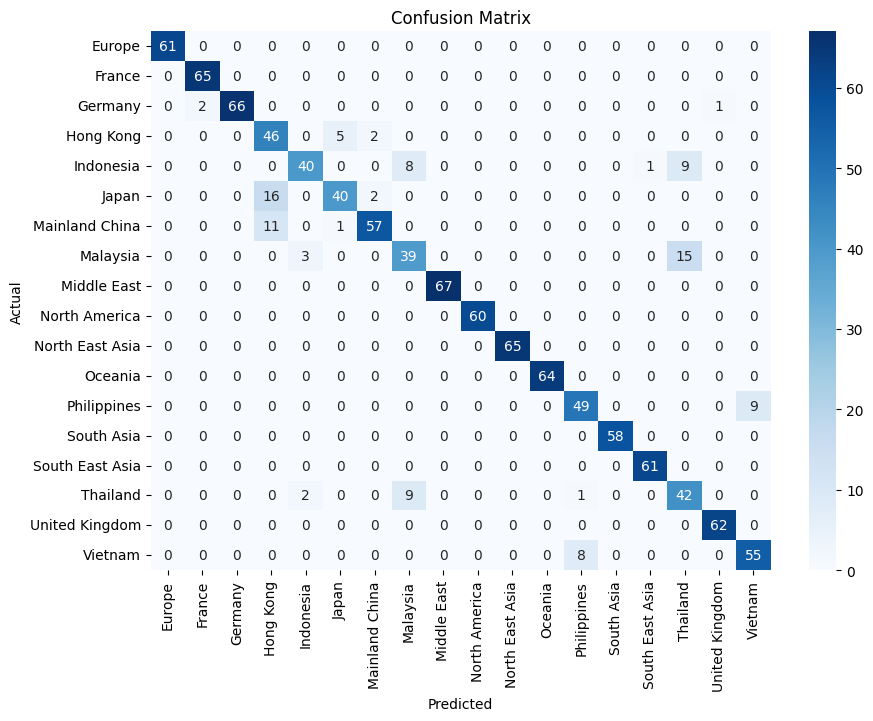

In [17]:
# Load the original dataset
#df = pd.read_csv("../Dataset/merged_flight_train_with_holidays.csv")
#df = pd.read_csv("../preprocessing/train_data.csv")
df = pd.read_csv("train_data_with_holidays.csv")

# Define features and target variable
X = df.drop(columns=['Country'])  # everything except country
y = df['Country']  # The target column


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)

# Print out classification results
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [4]:
print(df.dtypes)  # Find out which columns are non-numeric


Month                       int64
Year                        int64
Country                    object
Departures                float64
Arrivals                  float64
Quarter                     int64
Years_Since_2000            int64
Departures_Growth         float64
Arrivals_Growth           float64
Region_East Asia             bool
Region_Europe                bool
Region_Middle East           bool
Region_North America         bool
Region_Oceania               bool
Region_South Asia            bool
Region_South East Asia       bool
Is_Holiday_Month            int64
dtype: object


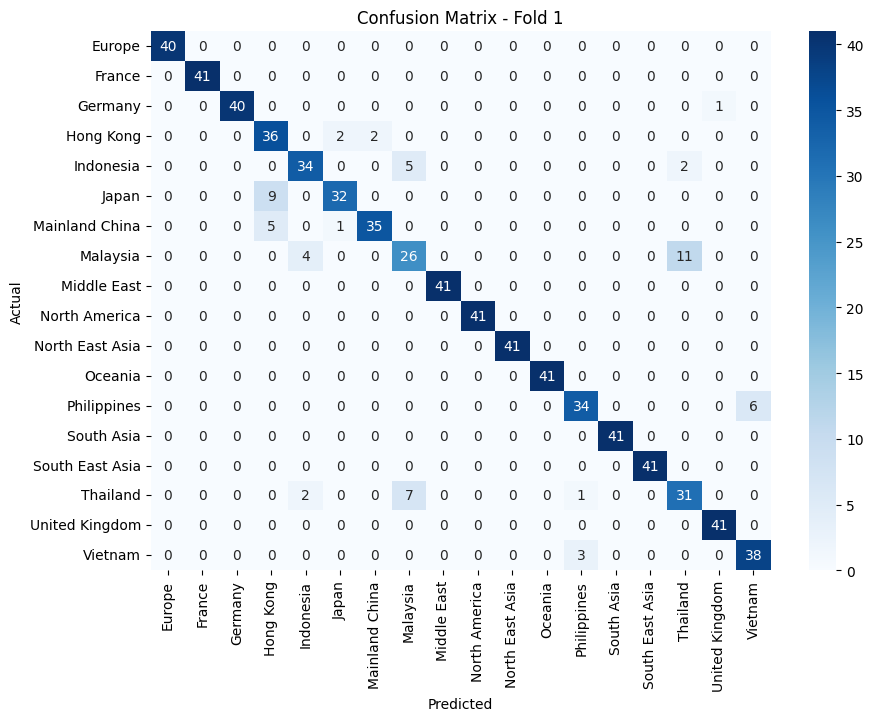

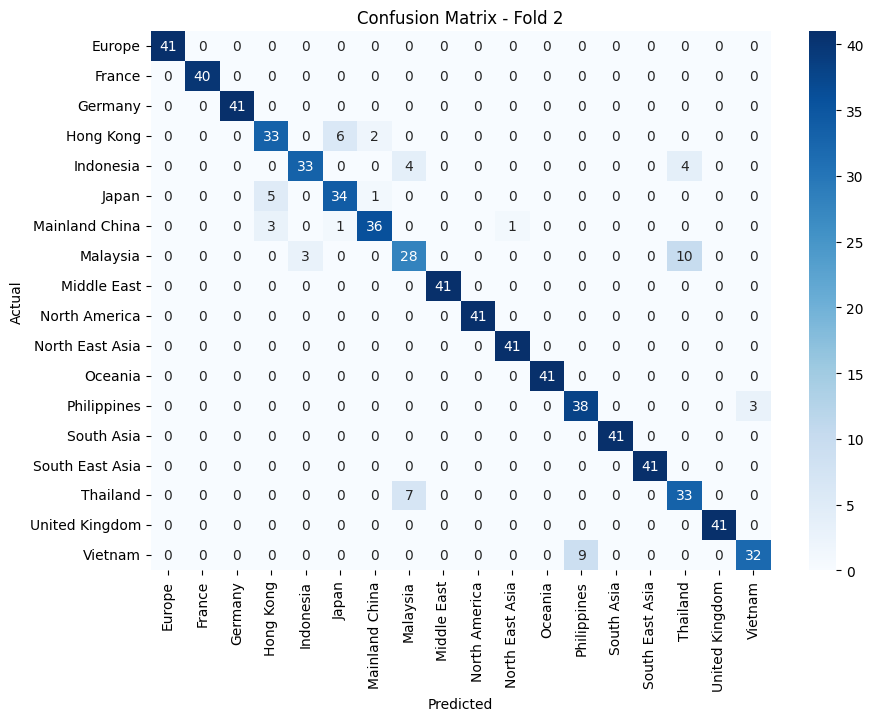

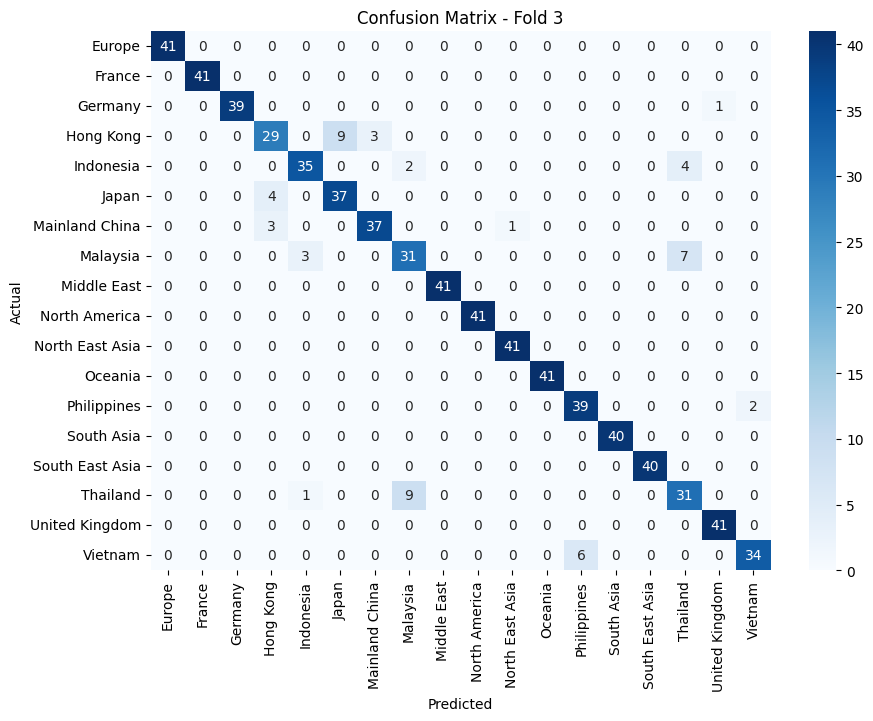

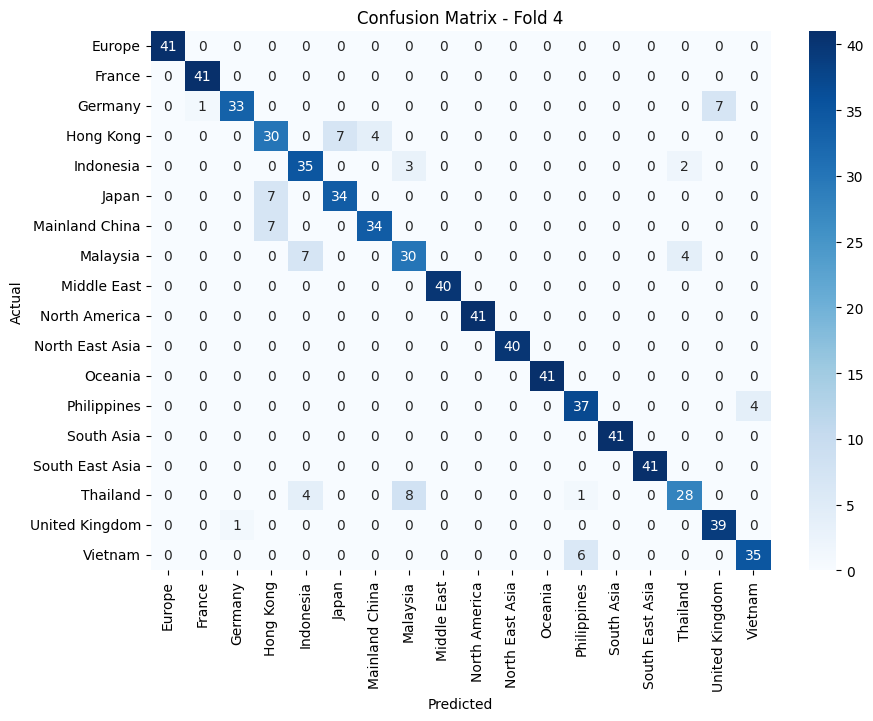

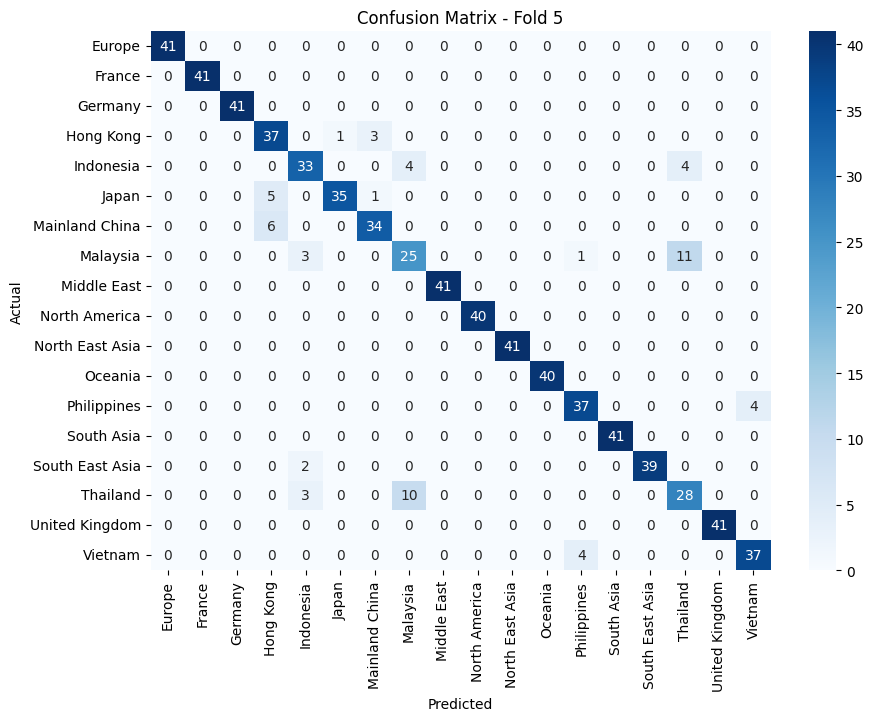

Mean Accuracy: 0.9156
Mean F1 Score: 0.9157
Mean Precision: 0.9178
Mean Recall: 0.9156


In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train_data_with_holidays.csv")

# Define features and target
X = df.drop(columns=['Country'])  # Features
y = df['Country']  # Target (Country classification)

# Initialize Stratified K-Fold Cross-Validation (5 folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
conf_matrices = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train Random Forest Classifier
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)
    
    # Predictions
    y_pred = classifier.predict(X_val)
    
    # Store evaluation metrics
    accuracy_list.append(accuracy_score(y_val, y_pred))
    f1_list.append(f1_score(y_val, y_pred, average='weighted'))
    precision_list.append(precision_score(y_val, y_pred, average='weighted'))
    recall_list.append(recall_score(y_val, y_pred, average='weighted'))

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    conf_matrices.append(cm)
    
    # Plot confusion matrix for each fold
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.show()

# Print average results
print(f"Mean Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Mean F1 Score: {np.mean(f1_list):.4f}")
print(f"Mean Precision: {np.mean(precision_list):.4f}")
print(f"Mean Recall: {np.mean(recall_list):.4f}")


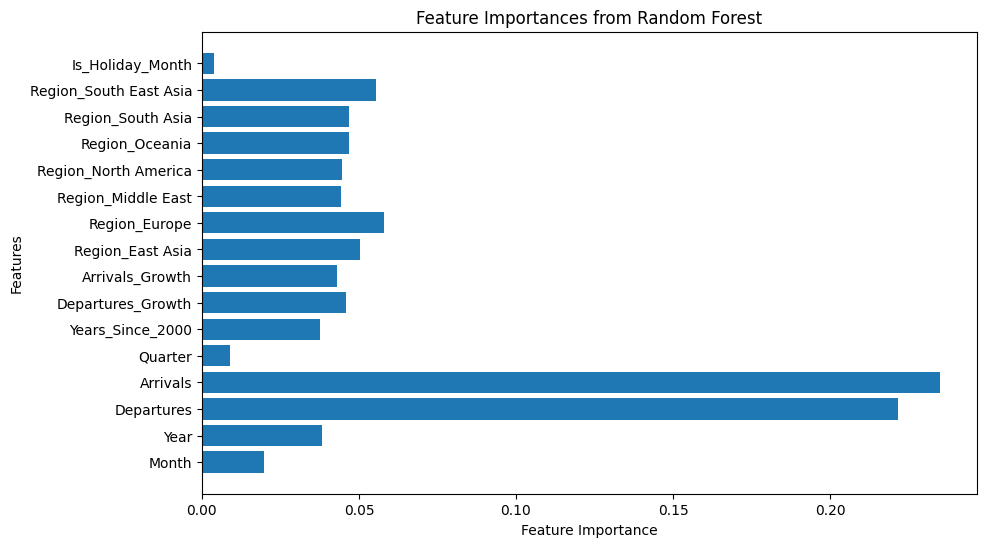

In [15]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()


In [18]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid for Random Search
param_grid = {
    'n_estimators': np.arange(50, 300, 50),  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=50,  
    cv=5,  
    verbose=2,  
    n_jobs=-1,  
    random_state=42
)

# Fit Random Search on training data
random_search.fit(X_train, y_train)

# Get the best model from the search
best_rf = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
print("Tuned Model Performance:")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}
Tuned Model Performance:
                 precision    recall  f1-score   support

         Europe       1.00      1.00      1.00        61
         France       0.98      1.00      0.99        65
        Germany       0.99      0.97      0.98        69
      Hong Kong       0.63      0.85      0.73        53
      Indonesia       0.87      0.71      0.78        58
          Japan       0.86      0.72      0.79        58
 Mainland China       0.93      0.81      0.87        69
       Malaysia       0.77      0.72      0.75        57
    Middle East       1.00      1.00      1.00        67
  North America       1.00      1.00      1.00        60
North East Asia       1.00      1.00      1.00        65
        Oceania       1.00      1.00      1.00        64
    Philippines       0.84      0.90      0.87  

In [19]:
#gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    verbose=2,  # To see the progress
    n_jobs=-1,  # Use all available cores for parallel computation
    scoring='accuracy'  # Scoring metric, you can also use f1, precision, etc.
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the search
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model from grid search for prediction
best_rf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best = best_rf.predict(X_test)

# Print out classification results
print("Tuned Model Performance:")
print(classification_report(y_test, y_pred_best))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(cm)


Fitting 5 folds for each of 450 candidates, totalling 2250 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Model Performance:
                 precision    recall  f1-score   support

         Europe       1.00      1.00      1.00        61
         France       0.98      1.00      0.99        65
        Germany       0.99      0.97      0.98        69
      Hong Kong       0.63      0.85      0.73        53
      Indonesia       0.87      0.71      0.78        58
          Japan       0.86      0.72      0.79        58
 Mainland China       0.93      0.81      0.87        69
       Malaysia       0.77      0.72      0.75        57
    Middle East       1.00      1.00      1.00        67
  North America       1.00      1.00      1.00        60
North East Asia       1.00      1.00      1.00        65
        Oceania       1.00      1.00      1.00        64
    Philippines       0.84      0.90      0.